### Pre-training - feature extraction from VGG16 with Data augementation for cats_vs_dogs_small dataset

In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras import optimizers

Using TensorFlow backend.


In [4]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [5]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights)) 

This is the number of trainable weights before freezing the conv base: 30


In [7]:
conv_base.trainable=False

In [8]:
 print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [9]:
#generating batches of images from the directories and converting to integers
train_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\train'
val_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\validation'
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                  shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
val_generator = test_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [12]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10, validation_data=val_generator, 
                              validation_steps=50)

Epoch 1/10
100/100 [==============================] - 3428s 34s/step - loss: 0.5924 - acc: 0.6790 - val_loss: 0.4472 - val_acc: 0.8310
Epoch 2/10
100/100 [==============================] - 3756s 38s/step - loss: 0.4735 - acc: 0.7860 - val_loss: 0.3681 - val_acc: 0.8540
Epoch 3/10
100/100 [==============================] - 3521s 35s/step - loss: 0.4284 - acc: 0.7990 - val_loss: 0.3309 - val_acc: 0.8720
Epoch 4/10
100/100 [==============================] - 3616s 36s/step - loss: 0.3994 - acc: 0.8170 - val_loss: 0.3084 - val_acc: 0.8760
Epoch 5/10
100/100 [==============================] - 3255s 33s/step - loss: 0.3839 - acc: 0.8230 - val_loss: 0.2957 - val_acc: 0.8760
Epoch 6/10
100/100 [==============================] - 3265s 33s/step - loss: 0.3633 - acc: 0.8420 - val_loss: 0.2835 - val_acc: 0.8820
Epoch 7/10
100/100 [==============================] - 3234s 32s/step - loss: 0.3489 - acc: 0.8445 - val_loss: 0.2798 - val_acc: 0.8820
Epoch 8/10
100/100 [==============================] - 3

In [13]:
model.save('5. feature extraction VGG16 with_dataaugmentation.h5')

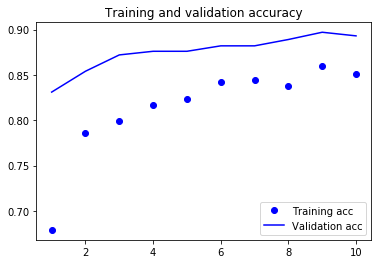

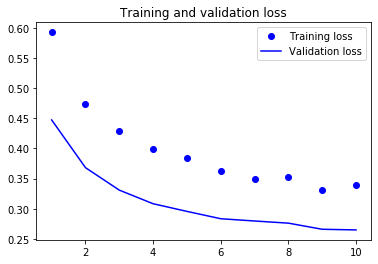

In [15]:
#visualize accuracy and loss during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()